# Petit démonstrateur qui injecte des contenus semantiques dans du HTML5 sous forme de microdonnées 
## ... après une requête SPARQL depuis DBpédia
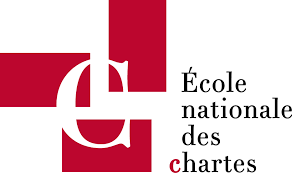

Ce petit Notebook Jupyter montre :

1. Comment **récolter des contenus depuis une base de connaissances**, à l'aide d'une **requête SPARQL**

2. Comment intégérer ces données dans du HTML5 en utilisant un des formats de sérialisation (ici les **microdonnées**).

In [1]:
def libraries():
  """
  This cell installs and loads several needed libraries from Python
  ------------------------------------------------------------
  This notebook is coded in Python 3
  - To display, it uses 
       + markdown (md)
       + and HTML 5 languages (with IPython.core.display)
          + Urllib
          + Image
          + schema.org in microdata for semantic contents
   - To query DBpedia
       + SPARQL is used (SPARQLWrapper, JSON)
  ------------------------------------------------------------
  """
# the query langage is SPARQL, we have to install it with pip
# (pip = packages installer for python)
%pip install SPARQLWrapper
# semantic communication with dbpedia
from SPARQLWrapper import SPARQLWrapper, JSON
# to draw lovely leaflet maps we need to install and load "folium"
# to easily display results and use HTML
from IPython.core.display import HTML
from IPython.display import Image
# to fix misencoded URL (i.e. URL of dpPedia pics)
import urllib.parse
#help(libraries)

Note: you may need to restart the kernel to use updated packages.


In [3]:
sparql = SPARQLWrapper("http://dbpedia.org/sparql")
# Query for the description of "École_Nationale_des_Chartes", filtered by language 
sparql.setQuery("""
PREFIX dbpedia-owl: <http://dbpedia.org/ontology/>              
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>                
SELECT ?label ?comment ?thumbnail
WHERE {                                
  <http://dbpedia.org/resource/École_Nationale_des_Chartes> rdfs:label ?label .                
  <http://dbpedia.org/resource/École_Nationale_des_Chartes> rdfs:comment ?comment .                               
  <http://dbpedia.org/resource/École_Nationale_des_Chartes> <http://xmlns.com/foaf/0.1/depiction> ?thumbnail .   
FILTER (LANG(?label)='en' AND LANG(?comment)='en')
}  
LIMIT 1
""")

# Convert results to JSON format
sparql.setReturnFormat(JSON)
result = sparql.query().convert()

for hit in result["results"]["bindings"]:
  abstract=hit["comment"]["value"]
  pic=hit["thumbnail"]["value"]
  title=hit["label"]["value"]
  pic_path='http://commons.wikimedia.org/wiki/Special:FilePath/'
  image_file_name=pic.replace('http://commons.wikimedia.org/wiki/Special:FilePath/','')
  image_file_name=image_file_name.replace('?width=300','')
  #print(image_file_name)
  encoded_pic_name = urllib.parse.quote(image_file_name)
  # We use microdata to inject some semantic content 
  # here a definition from dpepia
  code_html='<div itemscope itemtype="https://schema.org/DefinedTerm" id="'+title+'">'
  code_html+='<h2>What DBpedia has to say about <dfn itemprop="name">'+title+'</dfn> : </h2>'
  code_html+='<link itemprop="url" href="http://dbpedia.org/resource/École_Nationale_des_Chartes"/>'
  code_html+='<p itemprop="description">'+abstract+'</p>'
  code_html+='<link itemprop="inDefinedTermSet" href="http://dbpedia.org/">';
  code_html+='<img itemprop="image" src="'+pic_path+encoded_pic_name+'" title="'+title+'" alt="Picture from DPpedia">'
  code_html+='</div>'
  #print(code_html)
  display(HTML(code_html))

<hr>
<footer id="about">
<p style="text-align:right" xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/">
    Démonstrateur de formes sémantiques
    <img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;"
         src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1">
    <img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;"
         src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1">
    <img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;"
         src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1">
    <img style="height:22px!important;margin-left:3px;vertical-align:text-bottom"
         src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1">
     <br>
     by 
     <a rel="cc:attributionURL dct:creator" 
        property="cc:attributionName" 
        href="https://www.dhi-paris.fr/fr/institut/lequipe/equipe-scientifique/gerald-kembellec.html">
         Gérald Kembellec</a> is licensed under 
     <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" 
        target="_blank" 
        rel="license noopener noreferrer" style="display:inline-block;">
         CC BY-NC-SA 4.0
     </a>
</p>     
    <a id="mailme"
       href="mailto:gkembellec@dhi-paris.fr?subject=Semantic%20Publishing%20notebook&body=Dear%20Gérald%0A%0AAbout%20your%20notebook..."> - mail me.</a>
</footer>